<a href="https://colab.research.google.com/github/budhiacharya/AI-Lesson/blob/main/Assignment5_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5: Exploratory Data Analysis with Pandas

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1 - Load Dataset

In [3]:
local_path = "Titanic-Dataset.csv"
df = pd.read_csv(local_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# I have loaded given csv dataset to my local file then imported from there.

# Task 2 - Inspect the data (head, tail, dtypes, describe)

In [4]:
display(df.head())
display(df.tail())
display(df.dtypes)
display(df.describe())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Check missingness overview
display(df.isna().sum())

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In the dataset: Survived, Pclass, Age, SibSp, Parch, Fare are numerical; and Name, sex, Ticket, Cabin, Embarked are categorical variables. There is missing values of Age, Cabin, and Embarked in the dataset. I found higher dispersion in the fare.

# Task 3 - Clean and preprocess the data

In [6]:
# 3a. Create a categorical PclassCategory from Pclass
pclass_map = {1: "First", 2: "Second", 3: "Third"}
df["PclassCategory"] = df["Pclass"].map(pclass_map).astype("category")

# 3b. Create a categorical CabinCategory from Cabin (first letter if present, else 'Unknown')
def cabin_category(c):
    if pd.isna(c) or str(c).strip() == "":
        return "Unknown"
    return str(c).strip()[0]
df["CabinCategory"] = df["Cabin"].apply(cabin_category).astype("category")

# 3c. Handle missing Age — simple mean imputation (state assumption explicitly in notes)
age_mean = df["Age"].mean(skipna=True)
df["Age"] = df["Age"].fillna(age_mean)

# 3d. Create Family feature = SibSp + Parch
df["Family"] = df["SibSp"].fillna(0).astype(int) + df["Parch"].fillna(0).astype(int)

display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PclassCategory,CabinCategory,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Third,Unknown,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,First,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Third,Unknown,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,First,C,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Third,Unknown,0


The missing values in the Age column were imputed using the mean age to maintain dataset consistency while avoiding loss of observations. PclassCategory and CabinCategory transform numeric or sparse variables into grouped categorical features that capture socioeconomic status and cabin assignment patterns, which may improve model interpretability and predictive power. The Family feature (SibSp + Parch) serves as a reasonable proxy for group size, allowing us to analyze whether traveling alone or with others influenced survival outcomes

# Task 4 - Identify specific data points

In [7]:
# Highest fare passengers
max_fare = df["Fare"].max()
highest_fare_passengers = df[df["Fare"] == max_fare][["Name", "Fare", "Pclass", "Sex", "Age", "Survived"]]
print(f"Max fare: {max_fare}")
display(highest_fare_passengers)

# Largest family size passengers
max_family = df["Family"].max()
largest_family_passengers = df[df["Family"] == max_family][["Name", "Family", "SibSp", "Parch", "Pclass", "Sex", "Survived"]]
print(f"Largest family size: {max_family}")
display(largest_family_passengers)

Max fare: 512.3292


,Name,Fare,Pclass,Sex,Age,Survived
258,"Ward, Miss. Anna",512.3292,1,female,35.0,1
679,"Cardeza, Mr. Thomas Drake Martinez",512.3292,1,male,36.0,1
737,"Lesurer, Mr. Gustave J",512.3292,1,male,35.0,1


Largest family size: 10


,Name,Family,SibSp,Parch,Pclass,Sex,Survived
159,"Sage, Master. Thomas Henry",10,8,2,3,male,0
180,"Sage, Miss. Constance Gladys",10,8,2,3,female,0
201,"Sage, Mr. Frederick",10,8,2,3,male,0
324,"Sage, Mr. George John Jr",10,8,2,3,male,0
792,"Sage, Miss. Stella Anna",10,8,2,3,female,0
846,"Sage, Mr. Douglas Bullen",10,8,2,3,male,0
863,"Sage, Miss. Dorothy Edith ""Dolly""",10,8,2,3,female,0


It is observed that passengers who paid higher fares generally belonged to higher classes and had higher survival rates, while those with larger family sizes tended to be in lower classes and had lower chances of survival.

# Task 5 - Demonstrate Pandas Series and DataFrame functionalities:

In [8]:
# 5a. Series of passenger names
names_series = df["Name"]
display(names_series.head())

# 5b. DataFrame of names and ages
names_ages_df = df[["Name", "Age"]].copy()
display(names_ages_df.head())

# 5c. Slice: passengers older than 50
older_passengers = df.loc[df["Age"] > 50, ["Name", "Age", "Sex", "Pclass", "Survived"]].sort_values("Age", ascending=False)
display(older_passengers.head(10))

# indexing examples
# position-based (iloc) and label-based (loc)
example_iloc = df.iloc[:5, :5]
example_loc = df.loc[df.index[:5], ["Name", "Sex", "Age"]]
display(example_iloc)
display(example_loc)

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0


,Name,Age,Sex,Pclass,Survived
630,"Barkworth, Mr. Algernon Henry Wilson",80.0,male,1,1
851,"Svensson, Mr. Johan",74.0,male,3,0
96,"Goldschmidt, Mr. George B",71.0,male,1,0
493,"Artagaveytia, Mr. Ramon",71.0,male,1,0
116,"Connors, Mr. Patrick",70.5,male,3,0
672,"Mitchell, Mr. Henry Michael",70.0,male,2,0
745,"Crosby, Capt. Edward Gifford",70.0,male,1,0
33,"Wheadon, Mr. Edward H",66.0,male,2,0
456,"Millet, Mr. Francis Davis",65.0,male,1,0
280,"Duane, Mr. Frank",65.0,male,3,0


,PassengerId,Survived,Pclass,Name,Sex
0,1,0,3,"Braund, Mr. Owen Harris",male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,3,1,3,"Heikkinen, Miss. Laina",female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,5,0,3,"Allen, Mr. William Henry",male


,Name,Sex,Age
0,"Braund, Mr. Owen Harris",male,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss. Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,"Allen, Mr. William Henry",male,35.0


A Series is a one-dimensional labeled list (like a single column), while a DataFrame is a two-dimensional table made up of multiple Series (like a spreadsheet with rows and columns). Use loc when selecting data by labels (row/column names), and use iloc when selecting data by index positions (row/column numbers).

# Task 6 - Multi-indexing (survival rates by Sex and Pclass)

In [9]:
# We'll compute survival rate (mean of Survived) and present as a multi-index Series/DataFrame
survival_rates = df.groupby(["Sex", "Pclass"])["Survived"].mean().sort_index()
multi_index_df = survival_rates.to_frame(name="SurvivalRate")
display(multi_index_df)

# Also show as a pivot table for readability
display(pd.pivot_table(df, values="Survived", index="Sex", columns="Pclass", aggfunc="mean"))

SurvivalRate
Sex    Pclass              
female 1           0.968085
       2           0.921053
       3           0.500000
male   1           0.368852
       2           0.157407
       3           0.135447

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Female passengers in higher classes had a noticeably higher survival rate than males, suggesting that priority was likely given to women during the evacuation.

# Task 7 - Visualizations

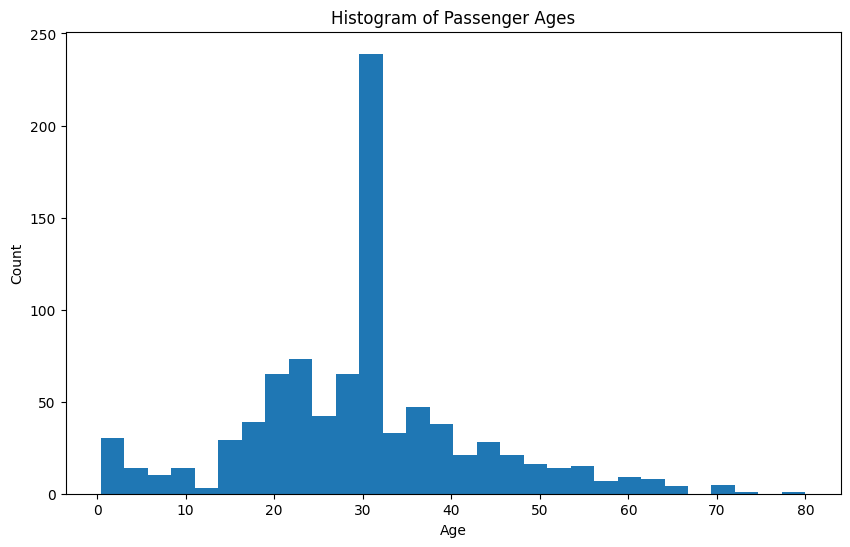

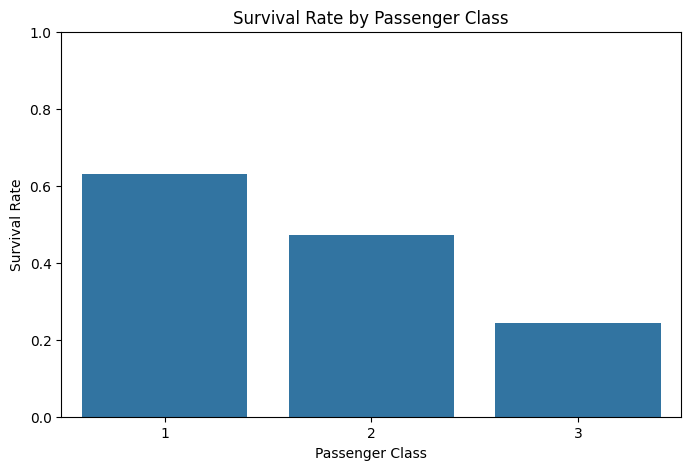

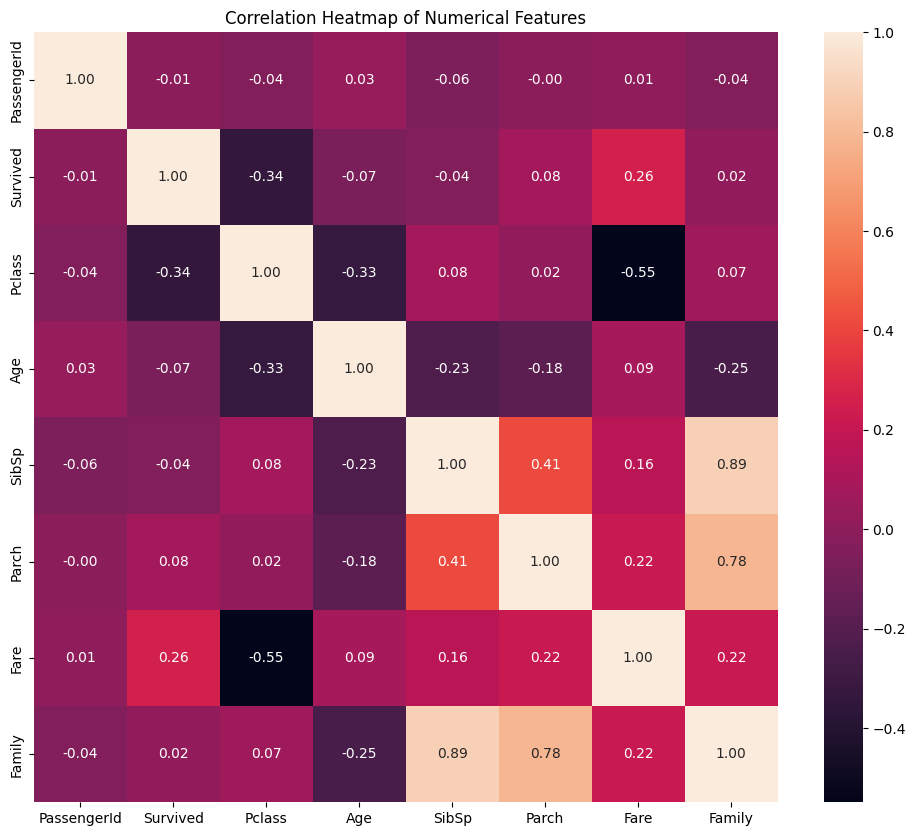

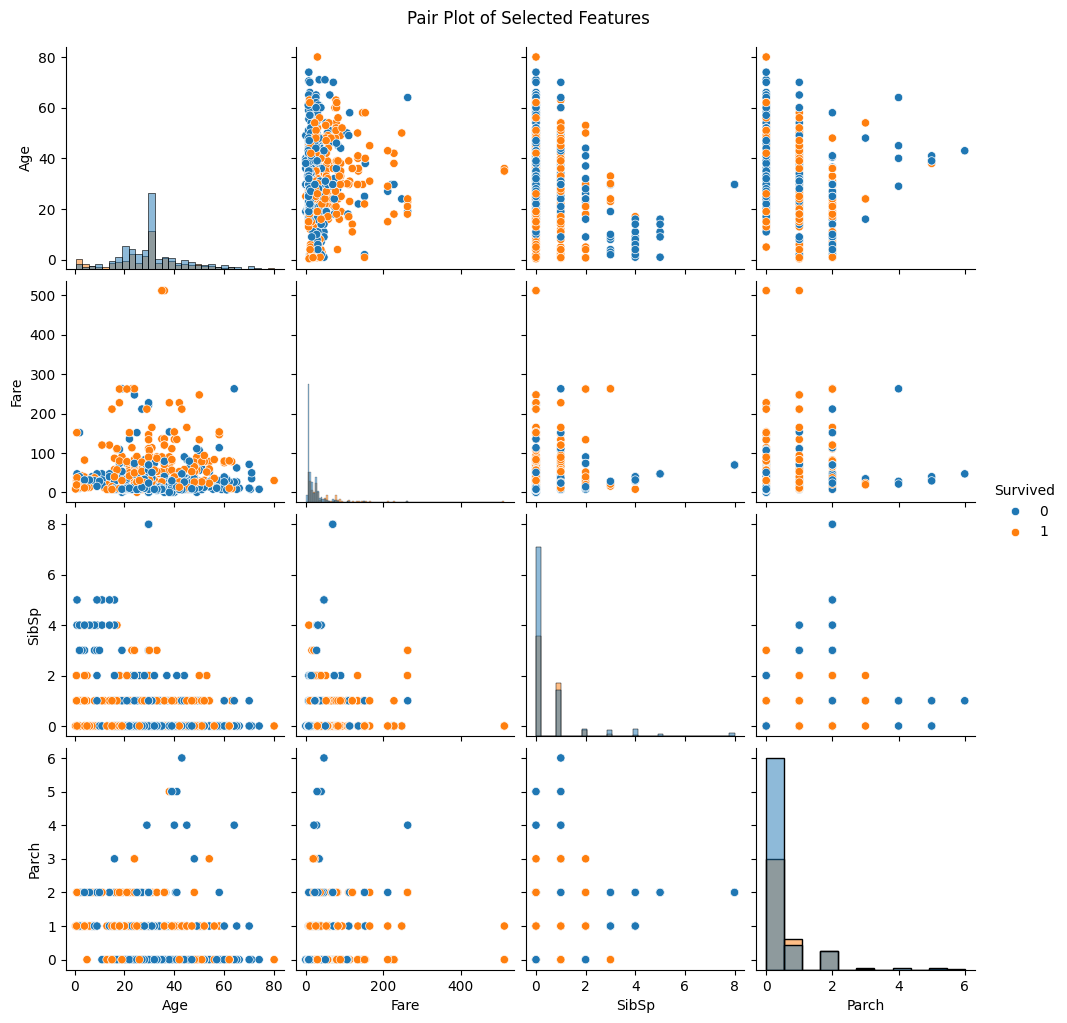

In [10]:
# 7a. Histogram of passenger ages
plt.figure(figsize=(10,6))
plt.hist(df["Age"], bins=30)
plt.title("Histogram of Passenger Ages")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 7b. Bar plot of survival rates by passenger class
survival_by_class = df.groupby("Pclass")["Survived"].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=survival_by_class, x="Pclass", y="Survived")
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.show()

# 7c. Heatmap of correlations between numerical features
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# 7d. Pair plot of selected features colored by Survived
pp_cols = ["Age", "Fare", "SibSp", "Parch", "Survived"]
sns.pairplot(df[pp_cols], hue="Survived", diag_kind="hist")
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

The histogram indicates that passengers in their 30s make up the largest age group on the ship.
The bar plot shows that passengers in higher classes had a higher survival rate.
There is a noticeable positive correlation between fare and survival rate, suggesting that passengers who paid higher fares were more likely to survive.

# Task 8 - Analyze survival rates by sex and passenger class

In [11]:
survival_by_sex = df.groupby("Sex")["Survived"].mean().sort_values(ascending=False)
display(survival_by_sex)

survival_by_class = df.groupby("Pclass")["Survived"].mean().sort_index()
display(survival_by_class)

,Survived
Sex,
female,0.742038
male,0.188908


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


The data reveals clear survival disparities: females had a significantly higher survival rate than males, and passengers in 1st class survived at much higher rates than those in 3rd class. These patterns suggest that both gender and socioeconomic status played major roles in determining survival outcomes on the Titanic dataset.

# Task 9 - Age distribution: box plot by class and sex

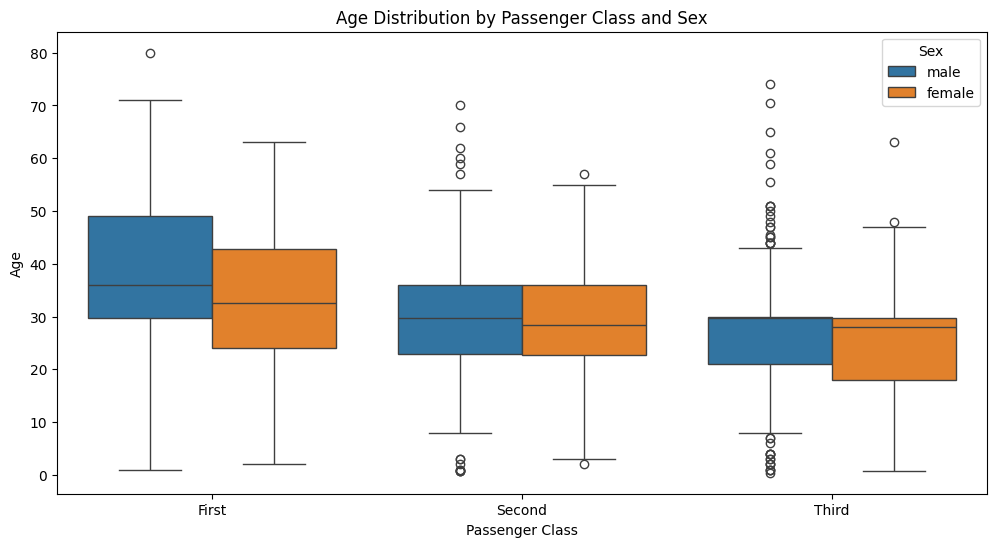

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="PclassCategory", y="Age", hue="Sex")
plt.title("Age Distribution by Passenger Class and Sex")
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.legend(title="Sex")
plt.show()

By class, median age is highest in 1st, lower in 2nd, and lowest in 3rd; 3rd class also shows the widest spread (more children and young outliers), while 1st class ages cluster more tightly around adulthood with a few elderly outliers.

By sex, males tend to be slightly older with a broader dispersion, whereas females skew younger and show tighter IQRs in 1st/2nd class; infant and very-elderly outliers appear across groups but are most common in 3rd and 2nd class.

# Task 10 - Fare distribution: violin by class and survival status

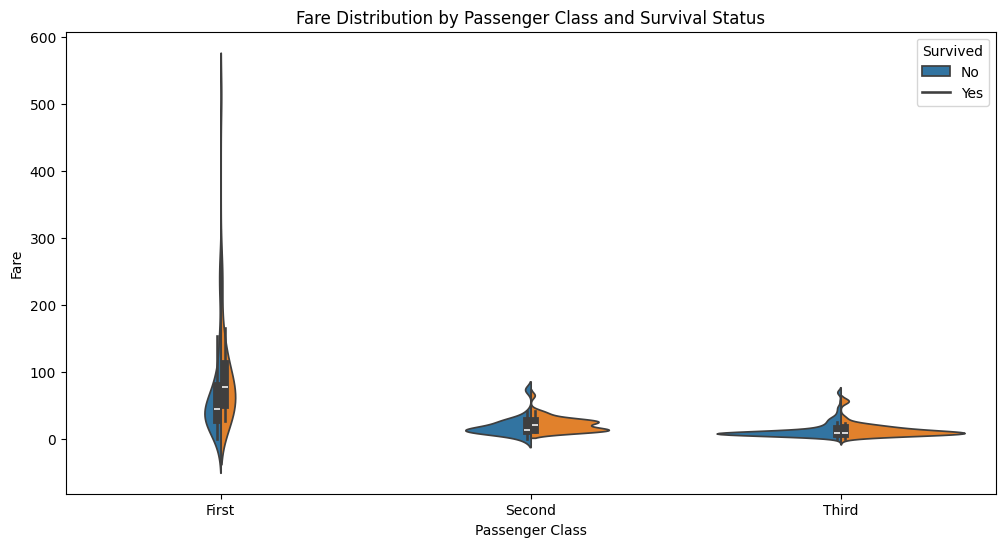

EDA tasks completed.


In [13]:
plt.figure(figsize=(12,6))
sns.violinplot(data=df, x="PclassCategory", y="Fare", hue="Survived", split=True)
plt.title("Fare Distribution by Passenger Class and Survival Status")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

print("EDA tasks completed.")